In [1]:
import torch

## 2.1 Создание нейронов и полносвязных слоев

2.1.1. Используя операции над матрицами и векторами из библиотеки `torch`, реализовать нейрон с заданными весами `weights` и `bias`. Прогнать вектор `inputs` через нейрон и вывести результат. 

In [2]:
class Neuron:
  def __init__(self, weights, bias):
    self.weights = weights 
    self. bias = bias
  
  def forward(self, inputs):
    return torch.dot(inputs, self.weights) + self.bias


In [3]:
inputs = torch.tensor([1.0, 2.0, 3.0, 4.0])
weights = torch.tensor([-0.2, 0.3, -0.5, 0.7])
bias = 3.14

In [4]:
n = Neuron(weights, bias)
n.forward(inputs)

tensor(4.8400)

2.1.2 Используя операции над матрицами и векторами из библиотеки `torch`, реализовать полносвязный слой с заданными весами `weights` и `biases`. Прогнать вектор `inputs` через слой и вывести результат. 

In [5]:
class Linear:
  def __init__(self, weights, biases):
    self.weights = weights 
    self. biases = biases
  
  def forward(self, inputs):
    return torch.matmul(inputs, self.weights) + self.biases

In [6]:
inputs = torch.tensor([1.0, 2.0, 3.0, 4.0])
weights = torch.tensor([[-0.2, 0.3, -0.5, 0.7],
                        [0.5, -0.91, 0.26, -0.5],
                        [-0.26, -0.27, 0.17, 0.87]]).T

biases = torch.tensor([3.14, 2.71, 7.2])

In [7]:
n = Linear(weights, biases)
n.forward(inputs)

tensor([ 4.8400,  0.1700, 10.3900])

2.1.3 Реализовать полносвязный слой из __2.1.2__ таким образом, чтобы он мог принимать на вход матрицу (батч) с данными. Продемонстрировать работу.
Результатом прогона сквозь слой должна быть матрица размера `batch_size` x `n_neurons`.


In [8]:
inputs = torch.tensor([[1, 2, 3, 2.5], 
                       [2, 5, -1, 2], 
                       [-1.5, 2.7, 3.3, -0.8]])

In [9]:
class Linear:
  def __init__(self, weights, biases):
    self.weights = weights 
    self.biases = biases
  
  def forward(self, inputs):
    return inputs @ self.weights + self.biases

In [10]:
n = Linear(weights, biases)
n.forward(inputs)

tensor([[ 3.7900,  0.9200,  9.0850],
        [ 6.1400, -2.1000,  6.9000],
        [ 2.0400,  0.7610,  6.7260]])

2.1.4 Используя операции над матрицами и векторами из библиотеки `torch`, реализовать полносвязный слой из `n_neurons` нейронов с `n_features` весами у каждого нейрона (инициализируются из стандартного нормального распределения). Прогнать вектор `inputs` через слой и вывести результат. Результатом прогона сквозь слой должна быть матрица размера `batch_size` x `n_neurons`.

In [11]:
class Linear:
  def __init__(self, n_features, n_neurons):
    self.weights = torch.randn(n_features, n_neurons)
    self.biases = torch.zeros(n_neurons)
  
  def forward(self, inputs):
    return inputs @ self.weights + self.biases

In [12]:
n = Linear(4, 3)
n.forward(inputs)

tensor([[ 3.1000, -1.5442, -2.7369],
        [ 5.5069,  5.0604,  2.8448],
        [ 0.3507, -4.3795,  0.8070]])

2.1.5 Используя решение из __2.1.4__, создать 2 полносвязных слоя и пропустить матрицу `inputs` последовательно через эти два слоя. Количество нейронов в первом слое выбрать произвольно, количество нейронов во втором слое выбрать так, чтобы результатом прогона являлась матрица (3x7). 

In [13]:
inputs = torch.tensor([[1, 2, 3, 2.5], 
                       [2, 5, -1, 2], 
                       [-1.5, 2.7, 3.3, -0.8]])

n1 = Linear(4, 4)
n2 = Linear(4, 7)
layer = n1.forward(inputs)
layer = n2.forward(layer)
display(layer)
layer.size()

tensor([[ -9.0820,  13.1693,  17.6330,  -2.8892,  -2.9015,  -1.7413, -14.3351],
        [ -1.2355,  -0.9568,  -2.8221,  -1.8139,  -0.5707,  -3.5876,  -3.2628],
        [-10.5305,  15.7577,  16.4911,   2.5541,  -3.3738,  -2.3697, -18.2271]])

torch.Size([3, 7])

## 2.2 Создание функций активации

2.2.1 Используя операции над матрицами и векторами из библиотеки `torch`, реализовать функцию активации ReLU:

![](https://wikimedia.org/api/rest_v1/media/math/render/svg/f4353f4e3e484130504049599d2e7b040793e1eb)

Создать матрицу размера (4,3), заполненную числами из стандартного нормального распределения, и проверить работоспособность функции активации.

In [14]:
class ReLU:
  def forward(self, inputs):
    return torch.clamp(inputs, min=0)

In [15]:
ReLU().forward(inputs)

tensor([[1.0000, 2.0000, 3.0000, 2.5000],
        [2.0000, 5.0000, 0.0000, 2.0000],
        [0.0000, 2.7000, 3.3000, 0.0000]])

In [16]:
# ПРОВЕРКА
m = torch.nn.ReLU()
m(inputs)

tensor([[1.0000, 2.0000, 3.0000, 2.5000],
        [2.0000, 5.0000, 0.0000, 2.0000],
        [0.0000, 2.7000, 3.3000, 0.0000]])

2.2.2 Используя операции над матрицами и векторами из библиотеки `torch`, реализовать функцию активации softmax:

![](https://wikimedia.org/api/rest_v1/media/math/render/svg/6d7500d980c313da83e4117da701bf7c8f1982f5)

Создать матрицу размера (4,3), заполненную числами из стандартного нормального распределения, и проверить работоспособность функции активации. Строки матрицы трактовать как выходы линейного слоя некоторого классификатора для 4 различных примеров.

In [17]:
inputs_ = torch.randn(4, 3)

In [18]:
class Softmax:
  def forward(self, inputs):
    return torch.exp(inputs) / torch.sum(torch.exp(inputs), axis=0)

In [19]:
Softmax().forward(inputs_)

tensor([[0.3170, 0.2494, 0.1513],
        [0.6202, 0.1709, 0.1240],
        [0.0459, 0.2248, 0.2998],
        [0.0168, 0.3549, 0.4249]])

In [20]:
# ПРОВЕРКА
m = torch.nn.Softmax(dim=0)
m(inputs_)

tensor([[0.3170, 0.2494, 0.1513],
        [0.6202, 0.1709, 0.1240],
        [0.0459, 0.2248, 0.2998],
        [0.0168, 0.3549, 0.4249]])

2.2.3 Используя операции над матрицами и векторами из библиотеки `torch`, реализовать функцию активации ELU:

![](https://wikimedia.org/api/rest_v1/media/math/render/svg/eb23becd37c3602c4838e53f532163279192e4fd)

Создать матрицу размера (4,3), заполненную числами из стандартного нормального распределения, и проверить работоспособность функции активации.

In [21]:
class ELU:
  def __init__(self, alpha):
    self.alpha = alpha

  def forward(self, inputs):
    return torch.where(torch.lt(inputs, 0), self.alpha * (torch.exp(inputs) - 1),  inputs)

In [22]:
inputs_ = torch.randn(4, 3)
alpha = 5
ELU(5).forward(inputs_)

tensor([[-3.3645, -3.7267, -3.2621],
        [ 0.0466, -3.8871,  0.5974],
        [-4.4220,  0.5375,  0.5129],
        [-3.6284, -1.2069,  0.2977]])

In [23]:
# ПРОВЕРКА
m = torch.nn.ELU(5)
m(inputs_)

tensor([[-3.3645, -3.7267, -3.2621],
        [ 0.0466, -3.8871,  0.5974],
        [-4.4220,  0.5375,  0.5129],
        [-3.6284, -1.2069,  0.2977]])

## 2.3 Создание функции потерь

2.3.1 Используя операции над матрицами и векторами из библиотеки `torch`, реализовать функцию потерь MSE:

![](https://wikimedia.org/api/rest_v1/media/math/render/svg/e258221518869aa1c6561bb75b99476c4734108e)

Создать полносвязный слой с 1 нейроном, прогнать через него батч `inputs` и посчитать значение MSE, трактуя вектор `y` как вектор правильных ответов.

In [24]:
class MSELoss:
  def forward(self, y_pred, y_true):
    return torch.square(y_true - y_pred).mean()

In [25]:
inputs = torch.tensor([[1, 2, 3, 2.5], 
                       [2, 5, -1, 2], 
                       [-1.5, 2.7, 3.3, -0.8]])

y = torch.tensor([2, 3, 4])

In [26]:
layer = Linear(4, 1).forward(inputs)
MSELoss().forward(layer, y.view(3, 1))

tensor(6.6155)

In [27]:
# ПРОВЕРКА

loss = torch.nn.MSELoss()
loss(layer, y.view(3, 1))

tensor(6.6155)

2.3.2 Используя операции над матрицами и векторами из библиотеки `torch`, реализовать функцию потерь Categorical Cross-Entropy:

<img src="https://i.ibb.co/93gy1dN/Screenshot-9.png" width="200">

Создать полносвязный слой с 3 нейронами и прогнать через него батч `inputs`. Полученный результат пропустить через функцию активации softmax. Посчитать значение CCE, трактуя вектор `y` как вектор правильных ответов.

In [28]:
class CategoricalCrossentropyLoss:
  def forward(self, y_pred, y_true):
    # return -1 * torch.sum(y_true @ y_pred.log())
    return -1 * torch.sum(y_true * torch.log(y_pred))


In [29]:
inputs = torch.tensor([[1, 2, 3, 2.5], 
                        [2, 5, -1, 2], 
                        [-1.5, 2.7, 3.3, -0.8]])
y = torch.tensor([1., 0., 0.])

In [30]:
layer = Linear(4, 3).forward(inputs)
activate = Softmax().forward(layer)
CategoricalCrossentropyLoss().forward(activate.T, y)

tensor(9.2950)

2.3.3 Модифицировать 2.3.1, добавив L2-регуляризацию.

![](https://wikimedia.org/api/rest_v1/media/math/render/svg/d92ca2429275bfdc0474523babbafe014ca8b580)


In [31]:
class MSELossL2:
  def __init__(self, lambda_, layer_):
    # <создать атрибут объекта alpha>
    self.alpha = lambda_
    self.layer = layer_

  def data_loss(self, y_pred, y_true):
    # <подсчет первого слагаемого из формулы>
    return torch.sum(torch.square(y_true - y_pred))

  def reg_loss(self):
    # используйте атрибуты объекта layer, в которых хранятся веса слоя
    # <подсчет второго слагаемого из формулы>
    weights = self.layer.weights
    return self.alpha * torch.sum(torch.square(weights)) 

  def forward(self, y_pred, y_true):
    return self.data_loss(y_pred, y_true) + self.reg_loss()

In [32]:
linear_thing = Linear(4, 1)
MSELossL2(0.05, linear_thing).forward(linear_thing.forward(inputs), y)

tensor(91.7134)

## 2.4 Обратное распространение ошибки

2.4.1 Используя один нейрон и SGD (1 пример за шаг), решите задачу регрессии

In [33]:
from sklearn.datasets import make_regression

X, y, coef = make_regression(n_features=4, n_informative=4, coef=True, bias=0.5)
X = torch.from_numpy(X).float() # <преобразуйте массивы numpy в тензоры torch с типом torch.float32
y = torch.from_numpy(y).float() # <преобразуйте массивы numpy в тензоры torch с типом torch.float32

In [34]:
X.dtype, y.dtype

(torch.float32, torch.float32)

[Граф вычислений для этой задачи](https://i.ibb.co/2dhDxZx/photo-2021-02-15-17-18-04.jpg)

2.4.1.1 Реализуйте класс `SquaredLoss`


In [35]:
class SquaredLoss:
  def forward(self, y_pred, y_true):
    self.loss = (y_pred - y_true)**2
    return self.loss

  def backward(self, y_pred, y_true):
    self.dinput = 2 * (y_pred - y_true)

2.4.1.2. Модифицируйте класс `Neuron` из __2.1.1__:

  1) Сделайте так, чтобы веса нейрона инициализировались из стандартного нормального распределения

  2) Реализуйте расчет градиента относительно весов `weights` и `bias`

In [36]:
class Neuron:
  def __init__(self, n_inputs):
    # <создать атрибуты объекта weights и bias>
    self.weights = torch.randn(n_inputs)
    self.bias = torch.zeros(n_inputs)
  
  def forward(self, inputs):
    self.inputs = inputs
    return inputs @ self.weights + self.bias
  
  def backward(self, dvalue):
    # dvalue - значение производной, которое приходит нейрону от следующего слоя сети
    # в данном случае это будет значение df/dc (созданное методом backwards у объекта MSELoss)
    self.dweights = dvalue * self.inputs # df/dW
    self.dinput = dvalue * self.weights # df/dX
    self.dbias = dvalue # df/db


2.4.1.3 Допишите цикл для настройки весов нейрона

[SGD](https://ru.wikipedia.org/wiki/%D0%A1%D1%82%D0%BE%D1%85%D0%B0%D1%81%D1%82%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%B8%D0%B9_%D0%B3%D1%80%D0%B0%D0%B4%D0%B8%D0%B5%D0%BD%D1%82%D0%BD%D1%8B%D0%B9_%D1%81%D0%BF%D1%83%D1%81%D0%BA)

![](https://wikimedia.org/api/rest_v1/media/math/render/svg/dda3670f8a8996a0d3bf80856bb4a166cc8db6d4)

In [37]:
n_inputs = 4 # <размерность элемента выборки >
learning_rate = 0.15 #  скорость обучения
n_epoch = 2_000 + 1 #  количество эпох

neuron = Neuron(n_inputs)
loss = SquaredLoss()

losses = []
for epoch in range(n_epoch):
  for x_example, y_example in zip(X, y):
    # forward pass
    y_pred = neuron.forward(x_example) # <прогон через нейрон>
    curr_loss = loss.forward(y_pred, y_example) # <прогон через функцию потерь>
    losses.append(curr_loss)
    # backprop
    loss.backward(y_pred, y_example)
    neuron.backward(loss.dinput)
    # <шаг оптимизации для весов (weights и bias) нейрона>
    neuron.weights -= learning_rate * neuron.dweights
    neuron.bias -= learning_rate * neuron.dbias
  if epoch % 200 == 0:
    print(f'epoch {epoch} mean loss {(sum(losses) / len(losses)).mean()}')

    

epoch 0 mean loss 629.464599609375
epoch 200 mean loss 3.1317036151885986
epoch 400 mean loss 1.5697566270828247
epoch 600 mean loss 1.0473750829696655
epoch 800 mean loss 0.7858582139015198
epoch 1000 mean loss 0.6288436055183411
epoch 1200 mean loss 0.5241236090660095
epoch 1400 mean loss 0.44930222630500793
epoch 1600 mean loss 0.39317452907562256
epoch 1800 mean loss 0.3495127260684967
epoch 2000 mean loss 0.31457892060279846


2.4.2 Решите задачу 2.4.1, используя пакетный градиентный спуск

Вычисления для этой задачи: 
[1](https://i.ibb.co/rmtQT6P/photo-2021-02-15-18-00-43.jpg)
[2](https://i.ibb.co/NmCFVnQ/photo-2021-02-15-18-01-17.jpg)

2.4.2.1 Модифицируйте класс `MSELoss` из __2.3.1__, реализовав расчет производной относительно предыдущего слоя с учетом того, что теперь работа ведется с батчами, а не с индивидуальными примерами
 

In [38]:
class MSELoss:
  def forward(self, y_pred, y_true):
    return torch.square(y_true - y_pred).mean()

  def backward(self, y_pred, y_true):
    self.dinput = (-2 * (y_true - y_pred)) / y_pred.shape[0] # df/dy^

2.4.2.2. Модифицируйте класс `Neuron` из __2.4.1.2__:

  1) Реализуйте метод `forward` таким образом, чтобы он мог принимать на вход матрицу (батч) с данными. 

  2) Реализуйте расчет градиента относительно весов `weights` и `bias` с учетом того, что теперь работа ведется с батчами, а не с индивидуальными примерами

In [39]:
class Neuron:
  def __init__(self, n_inputs):
    # <создать атрибуты объекта weights и bias>
    self.weights = torch.randn(1, n_inputs).T
    self.bias = torch.randn(1)
  
  def forward(self, inputs):
    # <реализовать логику нейрона>
    self.inputs = inputs
    # return torch.matmul(inputs, self.weights) + self.bias
    return inputs @ self.weights + self.bias 
  
  def backward(self, dvalue):
    # dvalue - значение градиента, которое приходит нейрону от следующего слоя сети
    # в данном случае это будет градиент L по y^ (созданный методом backwards у объекта MSELoss)
    self.dweights = self.inputs.T @ dvalue # df/dW
    self.dbias = dvalue.sum() # df/db


2.4.2.3 Допишите цикл для настройки весов нейрона

In [40]:
n_inputs = X.shape[1] # <размерность элемента выборки >
learning_rate = 0.25 #  скорость обучения
n_epoch = 5000 + 1 #  количество эпох

neuron = Neuron(n_inputs)
loss = MSELoss()

losses=[]
y_ = torch.unsqueeze(y, 1)

for epoch in range(n_epoch):
    # forward pass
    y_pred = neuron.forward(X)# <прогон через нейрон>
    curr_loss = loss.forward(y_pred, y_) # <прогон через функцию потерь>
    losses.append(curr_loss)

    # backprop
    # <вызов методов backward>
    loss.backward(y_pred, y_)
    neuron.backward(loss.dinput)
    # обратите внимание на последовательность вызовов: от конца к началу
    neuron.weights -= learning_rate * neuron.dweights
    neuron.bias -= learning_rate * neuron.dbias
    # <шаг оптимизации для весов (weights и bias) нейрона>
    if epoch % 500 == 0:
      print(f'epoch {epoch} mean loss {(sum(losses) / len(losses)).mean()}')



epoch 0 mean loss 15364.099609375
epoch 500 mean loss 39.98154830932617
epoch 1000 mean loss 20.010746002197266
epoch 1500 mean loss 13.344940185546875
epoch 2000 mean loss 10.01037311553955
epoch 2500 mean loss 8.009099006652832
epoch 3000 mean loss 6.674693584442139
epoch 3500 mean loss 5.721438407897949
epoch 4000 mean loss 5.006437301635742
epoch 4500 mean loss 4.450290203094482
epoch 5000 mean loss 4.005350112915039


2.4.3  Используя один полносвязный слой и  пакетный градиетный спуск, решите задачу регрессии из __2.4.1__

2.4.3.1 Модифицируйте класс `Linear` из __2.1.4__. ([вычисление градиентов](https://i.ibb.co/kgVR6m6/photo-2021-02-15-21-30-28.jpg))

In [41]:
class Linear:
    def __init__(self, n_features, n_neurons):
        # <создать атрибуты объекта weights и biases>
        self.weights = torch.randn(n_neurons, n_features).T
        self.biases = torch.randn(n_neurons)
  
    def forward(self, inputs):
        self.inputs = inputs
        return inputs @ self.weights + self.biases # <реализовать логику слоя>

    def backward(self, dvalues):
        self.dweights = self.inputs.T @ dvalues # df/dW
        self.dbiases = torch.ones(dvalues.shape[0]) @ dvalues # df/db
        self.dinputs = dvalues @ self.weights.T # df/dX

2.4.3.2 Создайте слой с одним нейроном. Используя класс MSELoss из 2.4.2, убедитесь, что модель обучается

In [42]:
inputs = torch.tensor([[1, 2, 3, 2.5], 
                       [2, 5, -1, 2], 
                       [-1.5, 2.7, 3.3, -0.8]])
y = torch.tensor([0, 0, 1])


In [43]:
learning_rate = 0.05 #  скорость обучения
n_epoch = 1_000 + 1 #  количество эпох

linear = Linear(4, 3)
loss = MSELoss()

losses = []
for epoch in range(n_epoch):
    # forward pass
    y_pred = linear.forward(inputs)# <прогон через нейрон>
    curr_loss = loss.forward(y_pred, y) # <прогон через функцию потерь>
    losses.append(curr_loss)

    # backprop
    # <вызов методов backward>
    loss.backward(y_pred, y)
    linear.backward(loss.dinput)
    # обратите внимание на последовательность вызовов: от конца к началу
    linear.weights -= learning_rate * linear.dweights
    linear.biases -= learning_rate * linear.dbiases
    # <шаг оптимизации для весов (weights и bias) нейрона>
    if epoch % 100 == 0:
      print(f'epoch {epoch} mean loss {(sum(losses) / len(losses)).mean()}')


epoch 0 mean loss 8.325043678283691
epoch 100 mean loss 0.13557621836662292
epoch 200 mean loss 0.06812536716461182
epoch 300 mean loss 0.045492351055145264
epoch 400 mean loss 0.03414762765169144
epoch 500 mean loss 0.027331732213497162
epoch 600 mean loss 0.022784024477005005
epoch 700 mean loss 0.019533805549144745
epoch 800 mean loss 0.017095128074288368
epoch 900 mean loss 0.01519777812063694
epoch 1000 mean loss 0.01367951836436987


2.4.4 Используя наработки из 2.4, создайте нейросеть и решите задачу регрессии.

Предлагаемая архитектура: 
1. Полносвязный слой с 10 нейронами
2. Активация ReLU
3. Полносвязный слой с 1 нейроном

In [44]:
X = torch.linspace(-1, 1, 100).view(-1, 1)
y = X.pow(2) + 0.2 * torch.rand(X.size()) 

In [45]:
class Activation_ReLU:
  def forward(self, inputs):
    self.inputs = inputs
    self.output = inputs.clip(min=0)
    return self.output
  
  def backward(self, dvalues):
    self.dinputs = dvalues.clone()
    # print(self.dinputs)
    self.dinputs[self.inputs <= 0] = 0

In [46]:
y[:5]

tensor([[1.1512],
        [0.9980],
        [1.0534],
        [1.0691],
        [0.9397]])

In [47]:
# создание компонентов сети
fc1 = Linear(1, 10)
relu1 = Activation_ReLU()
fc2 = Linear(10, 1)

n_epoch = 2_000 + 1 #  количество эпох

# это было
loss = MSELoss()
lr = 0.02
ys = []

for epoch in range(n_epoch):
  # <forward pass>
  # fc1 > relu1 > fc2 > loss
  f1_forward = fc1.forward(X)
  relu1_forward = relu1.forward(f1_forward)
  fc2_forward = fc2.forward(relu1_forward)
  data_loss = loss.forward(fc2_forward, y) # <прогон через функцию потерь>

  if epoch % 200 == 0:
    print(f'epoch {epoch} mean loss {data_loss}')
    ys.append(fc2_forward)
  
  # <backprop> 
  # loss > fc2 > relu1 > fc1
  loss.backward(fc2_forward, y)
  fc2.backward(loss.dinput)
  relu1.backward(fc2.dinputs)
  fc1.backward(relu1.dinputs) 

  # <шаг оптимизации для fc1>
  fc1.weights -= lr * fc1.dweights
  fc1.biases -= lr * fc1.dbiases

  # <шаг оптимизации для fc2>
  fc2.weights -= lr * fc2.dweights
  fc2.biases -= lr * fc2.dbiases

epoch 0 mean loss 38.0857048034668
epoch 200 mean loss 0.011177928186953068
epoch 400 mean loss 0.0073930430226027966
epoch 600 mean loss 0.0063754660077393055
epoch 800 mean loss 0.005815118085592985
epoch 1000 mean loss 0.005417862441390753
epoch 1200 mean loss 0.005043545737862587
epoch 1400 mean loss 0.004761179909110069
epoch 1600 mean loss 0.0045384629629552364
epoch 1800 mean loss 0.00438272301107645
epoch 2000 mean loss 0.004279828164726496


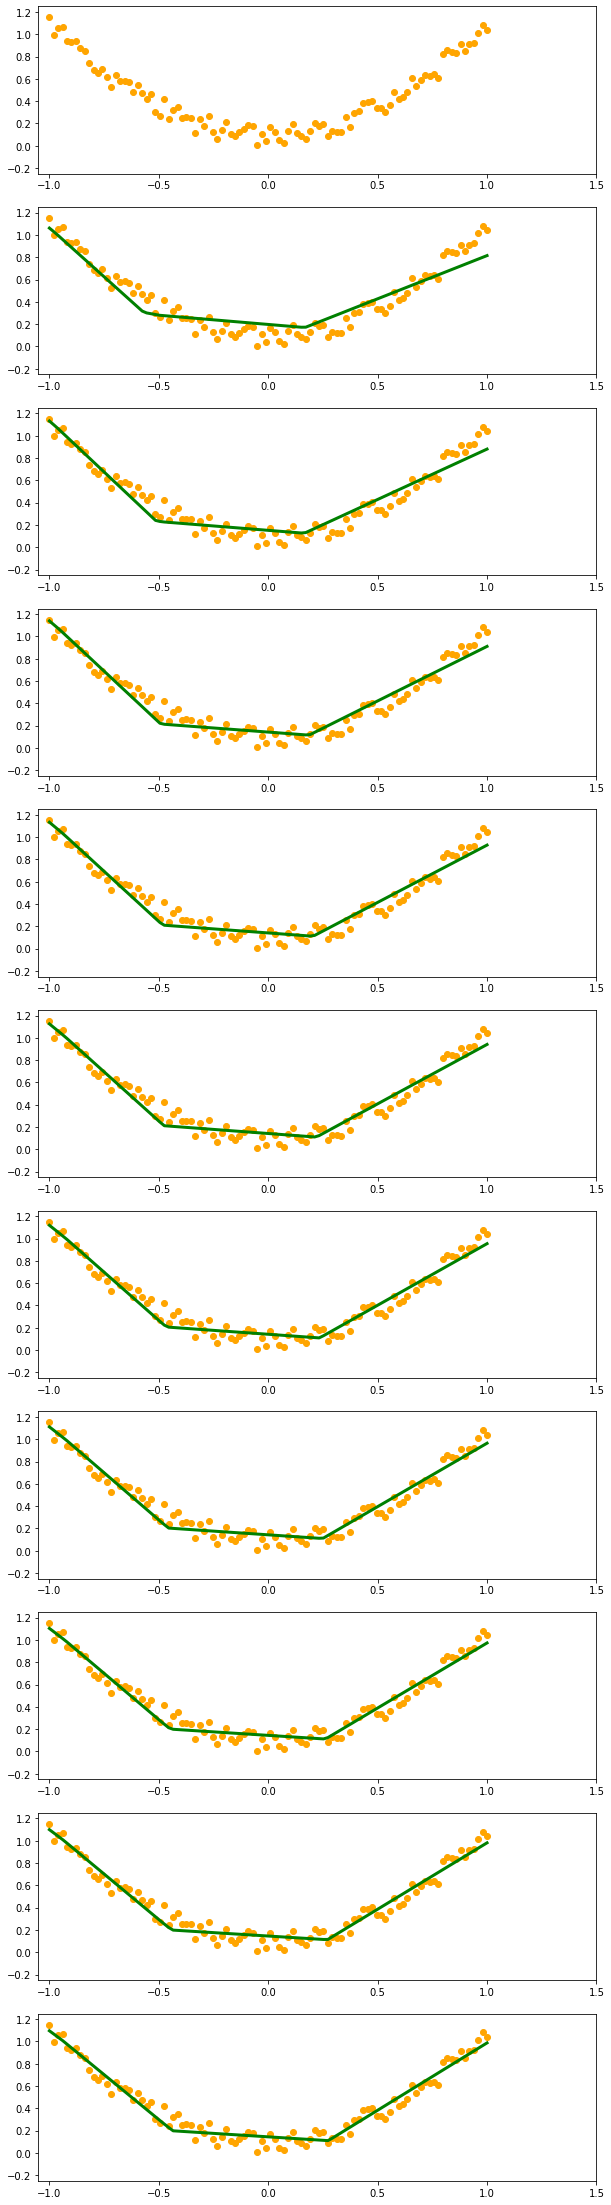

In [48]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(len(ys), 1, figsize=(10, 40))
for ax, y_ in zip(axs, ys):
  ax.scatter(X.numpy(), y.numpy(), color = "orange")
  ax.plot(X.numpy(), y_.numpy(), 'g-', lw=3)
  ax.set_xlim(-1.05, 1.5)
  ax.set_ylim(-0.25, 1.25)